In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with open('names.txt', 'r') as files:
    split_file = files.read().splitlines()

print (split_file)

In [ ]:
uniq_alph = set(''.join(split_file))
itos = {i+1:s for i,s in enumerate(sorted(uniq_alph))}
itos[0] = '.'
print(itos)
stoi = {s:i for i, s in itos.items()}
print(stoi)

In [ ]:

block_size = 3
X, Y = [], []
for w in split_file:
     context = [0] * block_size
     for ch in w + '.':
          ix = stoi[ch]
          X.append(context)
          Y.append(ix)
          #print(''.join(itos[i] for i in context), "--->", itos[ix])
          context = context[1:] + [ix]

In [ ]:
X= torch.tensor(X)
Y= torch.tensor(Y)

In [ ]:
print(X.shape, X.dtype, Y.shape, Y.dtype)

In [ ]:
C = torch.randn(27,2)
emb = C[X]
print(emb)
print(emb.shape)

In [ ]:
torch.cat(torch.unbind(emb, 1))

In [ ]:
a = torch.arange(0,18)
a.shape

In [ ]:
a.storage

In [ ]:
emb.shape

In [ ]:
w1 = torch.randn(6, 100); w1.requires_grad=True
b1 = torch.randn(100); b1.requires_grad=True
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
h.shape

In [ ]:
w2 = torch.randn(100, 27)
b2 = torch.randn(27)
logits = h@w2 + b2
output = logits.exp()/torch.sum(logits.exp(), 1, keepdim=True)
output.shape

In [ ]:
len(Y)

In [ ]:
loss = -output[torch.arange(len(Y)), Y].log().mean()
loss

In [1]:
#forward pass
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
with open('names.txt', 'r') as file:
    words = file.read().splitlines()

In [2]:
itos = {}
itos[0] = '.'
itos.update({i+1:s for i,s in enumerate(sorted(set(''.join(words))))})
stoi = {s:i for i,s in itos.items()}

In [3]:
block_size = 3

X, Y = [],[]
for w in words:
    context = [0]*block_size
    w = w + '.'
    for i in w:
        X.append(context)
        Y.append(stoi[i])
        context = context[1:] + [stoi[i]]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [13]:
g = torch.Generator().manual_seed(123456789)
C = torch.rand((27, 2), generator=g)
w1 = torch.rand((6, 100), generator=g)
b1 = torch.rand((100), generator=g)
w2 = torch.rand((100, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, w1, b1, w2, b2]

In [14]:
sum(p.nelement() for p in parameters)
for p in parameters:
    p.requires_grad = True

In [6]:
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (8192,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6)@w1 + b1)
    logits = h@w2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    loss.backward()
    print(i, loss.item())
    for p in parameters:
        p.data += -0.8*p.grad
        p.grad = None
#prob = logits.exp()/torch.sum(logits.exp(), 1, keepdim=True)
#loss = -prob[torch.arange(len(X)), Y].log().mean()
#loss

0 6.9287872314453125
1 11.258522033691406
2 17.91606330871582
3 21.948518753051758
4 15.02479076385498
5 10.69859504699707
6 8.012347221374512
7 6.774543762207031
8 4.892762660980225
9 4.412344455718994
10 3.6255576610565186
11 4.315329074859619
12 3.3652422428131104
13 3.1765518188476562
14 4.084747791290283
15 3.4712724685668945
16 3.0151185989379883
17 2.887507438659668
18 3.1274328231811523
19 2.8553645610809326
20 3.249739408493042
21 2.7754440307617188
22 3.1863763332366943
23 4.185527801513672
24 3.619365930557251
25 2.962498903274536
26 3.265012741088867
27 4.368119716644287
28 4.018637180328369
29 3.178067207336426
30 2.740518808364868
31 3.0007667541503906
32 2.8840067386627197
33 3.490567684173584
34 2.9741320610046387
35 2.8164796829223633
36 3.4866809844970703
37 2.92242169380188
38 3.1932928562164307
39 4.2414093017578125
40 3.6375176906585693
41 2.865156412124634
42 2.9905974864959717
43 3.851013422012329
44 3.5087153911590576
45 2.8441758155822754
46 3.323539972305298
4

In [ ]:
C[X[torch.randint(0, X.shape[0], (32,))]].shape

In [27]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6)@w1 + b1)
logits = h@w2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3393, grad_fn=<NllLossBackward0>)

In [26]:
#lri = []
#lossi = []
#lre = torch.linspace(-3, 0, 1000)
#lrs = 10**(lre)
for i in range(10000):
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6)@w1 + b1)
    logits = h@w2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    loss.backward()
    #print(i, loss.item())
    lr = 10**-0.8#lrs[i]
    for p in parameters:
        p.data += -lr*p.grad
        p.grad = None
    #lri.append(lre[i])
    #lossi.append(loss.item())
#prob = logits.exp()/torch.sum(logits.exp(), 1, keepdim=True)
#loss = -prob[torch.arange(len(X)), Y].log().mean()
#loss

In [ ]:
lri

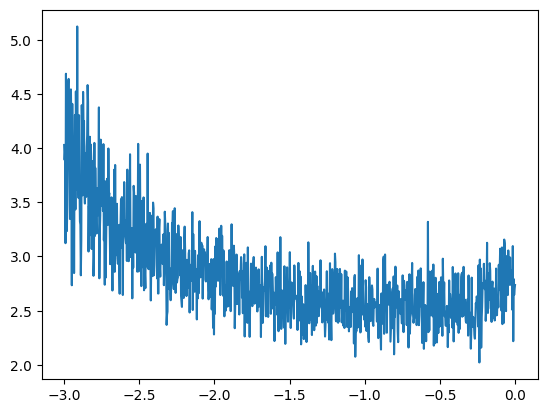

In [21]:
plt.plot(lri, lossi)

In [ ]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0]*3
        for ch in w + '.':
            X.append(context)
            Y.append(stoi[ch])
            context = context[1:] + [stoi[ch]]
    return torch.tensor(X), torch.tensor(Y)

import random
random.seed(42)
with open('names.txt', 'r') as file:
    words = file.read().splitlines()

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtrn, Ytrn = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xtst, Ytst = build_dataset(words[n2:])


In [56]:

g = torch.Generator().manual_seed(123456789)
C = torch.rand((27, 10), generator=g)
#C[X].shape will inform the following w1 shape
w1 = torch.rand((30, 200), generator=g)
b1 = torch.rand((200), generator=g)
w2 = torch.rand((200, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, w1, b1, w2, b2]
logits = None

for p in parameters:
    p.requires_grad = True

In [57]:
stepi = []
lossi = []
for i in range(20000):
    ix = torch.randint(0, Xtrn.shape[0], (1024,))
    emb = C[Xtrn[ix]]
    h = torch.tanh(emb.view(-1, 30)@w1 + b1)
    logits = h@w2 + b2
    loss = F.cross_entropy(logits, Ytrn[ix])
    loss.backward()
    stepi.append(i)
    lossi.append(loss.item())
    lr = 0.005#lrs[i]
    for p in parameters:
        p.data += -lr*p.grad
        p.grad = None
print (loss.item())

emb_val = C[Xval]
h_val = torch.tanh(emb_val.view(-1,30)@w1 + b1)
logits_val = h_val@w2 + b2
val_loss = F.cross_entropy(logits_val, Yval)
print(val_loss)

2.760923385620117
tensor(2.9176, grad_fn=<NllLossBackward0>)


In [48]:
print(loss.item())

2.6028082370758057


In [ ]:
plt.plot(stepi, lossi)

AttributeError: 'list' object has no attribute 'log10'

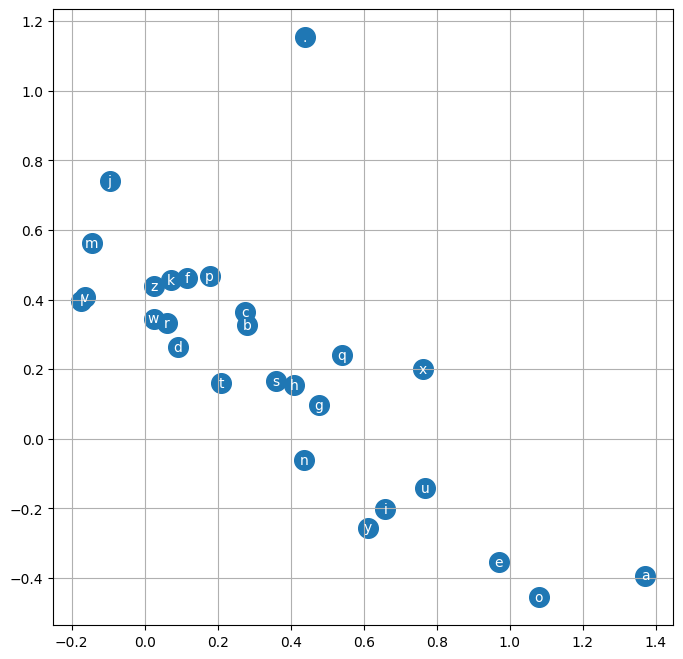

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [54]:
C[:,1].shape

torch.Size([27])